# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## <u>План проекта</u>

**Подготовка данных:**
* Импорт необходимых библиотек;
* Изучение датасета, заполнение пропусков, удаление ненужных в обучении моделей данных, составление первых выводов;
*Разделение данных на выборки - тренировочная, тестовая, валидационная;
* Преобразование категориальных данных в численные.

**Исследование задачи:**
* DecisionTreeClassifier;
* RandomForestClassifier;
* LogisticRegression.

**Борьба с дисбалансом:**
* Оценка соотношений ответов;
* Увеличение выборки на моделях;
* Уменьшение выборки на моделях;
* Сдвиг порога.

**Проверка лучшей модели на тестовой выборке**

**Итоги работы**

## Подготовка данных

* Импортируем библиотеки
* Знакомимся с данными
* Смотрим пропущенные значенния и заполняем их средним медианным + меняем тип данных

In [1]:
#!pip install scikit-learn==1.1.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import(OneHotEncoder,
                                 StandardScaler)

from sklearn.metrics import(accuracy_score,
                           confusion_matrix,
                           f1_score,
                           precision_score, recall_score,
                           precision_recall_curve,
                           roc_curve,
                           roc_auc_score)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('//content/Churn.csv')
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data['Tenure']=data['Tenure'].fillna(data['Tenure'].median()).astype('int64')

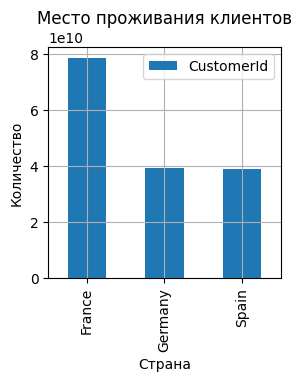

,CustomerId
Geography,
France,78672919670
Germany,39367604133
Spain,38868881891


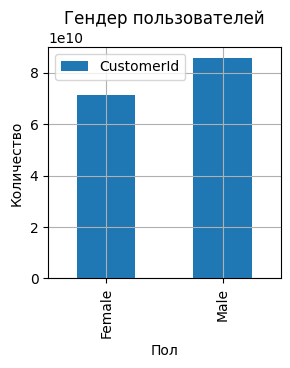

,CustomerId
Gender,
Female,71284888959
Male,85624516735


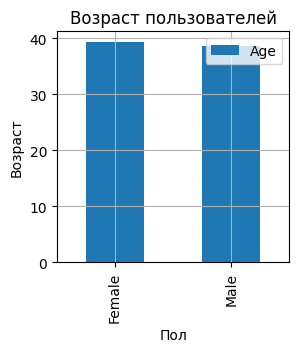

,Age
Gender,
Female,39.238389
Male,38.658237


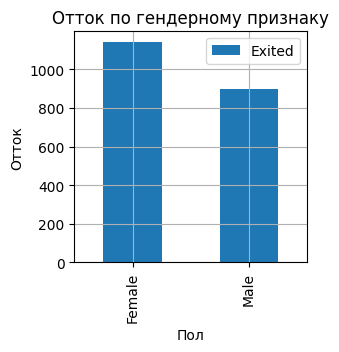

,Exited
Gender,
Female,1139
Male,898


In [5]:
geography_gr = data.pivot_table(index='Geography', values='CustomerId', aggfunc = 'sum')
geography_gr.plot(grid=True, kind='bar', figsize=(3, 3))
plt.title('Место проживания клиентов')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.show()
display(geography_gr)

geography_gr = data.pivot_table(index='Gender', values='CustomerId', aggfunc = 'sum')
geography_gr.plot(grid=True, kind='bar', figsize=(3, 3))
plt.title('Гендер пользователей')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()
display(geography_gr)

geography_gr = data.pivot_table(index='Gender', values='Age', aggfunc = 'mean')
geography_gr.plot(grid=True, kind='bar', figsize=(3, 3))
plt.title('Возраст пользователей')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.show()
display(geography_gr)


geography_gr = data.pivot_table(index='Gender', values='Exited', aggfunc = 'sum')
geography_gr.plot(grid=True, kind='bar', figsize=(3, 3))
plt.title('Отток по гендерному признаку')
plt.xlabel('Пол')
plt.ylabel('Отток')
plt.show()
display(geography_gr)

1. Познакомились с данными выборки, чтобы определить все ли категориальные данные нужны для обучения модели. Оставляем все столбцы с кат.данными, кроме фамилии - она нам ничего не даст.
2. Также удалим 'Surname', 'RowNumber', 'CustomerId'  - не нужны для расчетов.


Также интересно было посмотреть на средний возраст клиентов и отток по гендеру.

In [6]:
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
display(data.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Разделим данные на выборки:

In [7]:
train_valid, test = train_test_split(data, test_size=0.2, stratify = data['Exited'])
train, valid = train_test_split(train_valid, test_size=0.25, stratify = train_valid['Exited'])

features_train = train.drop(['Exited'], axis=1)
target_train = train['Exited']

features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']

features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

ml= [features_train, target_train, features_valid, target_valid, features_test, target_test]
for i in ml:
  print(i.shape)

(6000, 10)
(6000,)
(2000, 10)
(2000,)
(2000, 10)
(2000,)


Применим кодирование ОНЕ:

In [8]:
ohe_features_train = features_train.select_dtypes(include='object').columns.to_list()
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train[ohe_features_train])
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features_train])

features_train = features_train.drop(ohe_features_train, axis=1)

numeric = ['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
features_train[numeric] = scaler.fit_transform(features_train[numeric])
display(features_train.head())

features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[ohe_features_train])
features_valid = features_valid.drop(ohe_features_train, axis=1)
features_valid[numeric] = scaler.transform(features_valid[numeric])
display(features_valid.head())

features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features_train])
features_test = features_test.drop(ohe_features_train, axis=1)
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9778,0.858035,0.379487,1.465672,-1.192697,0.812912,0.647906,-1.031496,1.464813,0.0,0.0,0.0
1437,0.209021,-0.756795,0.005173,-1.192697,-0.911795,-1.543434,0.969466,-0.399996,0.0,0.0,0.0
4799,-1.036668,1.231698,-1.455327,-1.192697,-0.911795,-1.543434,-1.031496,-0.621038,0.0,0.0,1.0
7481,-0.251570,-0.472725,0.735422,0.613622,0.812912,0.647906,0.969466,-0.742081,0.0,0.0,1.0
1754,0.774292,-0.567415,0.005173,0.462585,0.812912,0.647906,-1.031496,0.382109,1.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5118,0.742888,0.095416,-0.725077,-1.192697,-0.911795,0.647906,0.969466,0.797123,0.0,0.0,1.0
43,1.925769,0.947628,-1.090202,0.907389,-0.911795,-1.543434,-1.031496,1.660529,0.0,0.0,0.0
73,-0.481865,-1.324936,0.005173,1.329122,0.812912,0.647906,0.969466,-0.711018,1.0,0.0,0.0
6538,-1.089008,-0.472725,-0.359952,1.450313,0.812912,0.647906,0.969466,-1.281190,0.0,0.0,1.0
4744,1.119735,1.137008,-1.455327,-1.192697,-0.911795,0.647906,0.969466,-1.331939,0.0,0.0,0.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9712,-0.136422,-0.662105,-0.725077,-1.192697,0.812912,0.647906,0.969466,1.720914,0.0,0.0,1.0
6379,0.303233,-0.188654,0.735422,-0.005795,-0.911795,0.647906,-1.031496,1.664929,0.0,0.0,1.0
8689,-1.130880,2.652051,1.830797,0.876011,-0.911795,-1.543434,0.969466,-1.357957,0.0,0.0,1.0
9097,0.816164,0.379487,0.735422,-1.192697,0.812912,0.647906,-1.031496,-1.032073,0.0,0.0,1.0
6567,0.125277,1.421079,-1.455327,1.812070,-0.911795,-1.543434,-1.031496,0.213880,0.0,1.0,0.0


Привели выборку к рабочему состоянию:
1. заполнили пропуски в данных,
2. удалили ненужные столбцы,
3. привели кат.значения к численным,
4. разделили выборку на обучающую, валидационную и тестовую,
5. сделали стандартизацию данных.


## Исследование задачи

DecisionTreeClassifier:

In [9]:
best_depth = 0
best_f1 = 0

for depth in range(1, 21):
    model_DT = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model_DT.fit(features_train, target_train)
    predicted_valid = model_DT.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1
    print(f'max_depth = {depth}, F1 = {f1}')


print(f'Лучший результат для модели Решающее дерево при глубине {best_depth}: F1 = {best_f1}')

probabilities = model_DT.predict_proba(features_valid)
probabilities_one_dt = probabilities[:, 1]
print('Площадь ROC-кривой_DT:', roc_auc_score(target_valid, probabilities_one_dt))

max_depth = 1, F1 = 0.0
max_depth = 2, F1 = 0.5134751773049645
max_depth = 3, F1 = 0.39024390243902435
max_depth = 4, F1 = 0.5360501567398119
max_depth = 5, F1 = 0.5925925925925927
max_depth = 6, F1 = 0.5545454545454546
max_depth = 7, F1 = 0.5301204819277109
max_depth = 8, F1 = 0.5550786838340486
max_depth = 9, F1 = 0.5658263305322129
max_depth = 10, F1 = 0.5329744279946165
max_depth = 11, F1 = 0.5291723202170964
max_depth = 12, F1 = 0.507343124165554
max_depth = 13, F1 = 0.5097529258777633
max_depth = 14, F1 = 0.5155666251556662
max_depth = 15, F1 = 0.515970515970516
max_depth = 16, F1 = 0.5114045618247299
max_depth = 17, F1 = 0.5260606060606061
max_depth = 18, F1 = 0.5090909090909091
max_depth = 19, F1 = 0.5035799522673031
max_depth = 20, F1 = 0.4964200477326969
Лучший результат для модели Решающее дерево при глубине 5: F1 = 0.5925925925925927
Площадь ROC-кривой_DT: 0.6853556175590074


RandomForestClassifier:

In [10]:
best_est = 0
best_depth = 0
best_f1 = 0

for estimators in range(100, 250, 30):
    for depth in range(1,21,1):
        model_RF=RandomForestClassifier(max_depth=depth, n_estimators=estimators, random_state=12345)
        model_RF.fit(features_train, target_train)
        predicted_valid=model_RF.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_est = estimators
            best_depth = depth
            best_f1 = f1
        print(f'n_estimators = {estimators}, max_depth = {depth}, F1 = {f1_score(target_valid, predicted_valid)}')
        print()

print(f'Лучший результат для модели Случайный лес при количестве деревьев {best_est} при глубине {best_depth}: F1 = {best_f1}')

probabilities = model_RF.predict_proba(features_valid)
probabilities_one_rf = probabilities[:, 1]
print('Площадь ROC-кривой_RF:', roc_auc_score(target_valid, probabilities_one_rf))

n_estimators = 100, max_depth = 1, F1 = 0.0

n_estimators = 100, max_depth = 2, F1 = 0.14578587699316628

n_estimators = 100, max_depth = 3, F1 = 0.24358974358974358

n_estimators = 100, max_depth = 4, F1 = 0.44280442804428044

n_estimators = 100, max_depth = 5, F1 = 0.5051546391752578

n_estimators = 100, max_depth = 6, F1 = 0.5357737104825291

n_estimators = 100, max_depth = 7, F1 = 0.541871921182266

n_estimators = 100, max_depth = 8, F1 = 0.5525040387722132

n_estimators = 100, max_depth = 9, F1 = 0.5637795275590551

n_estimators = 100, max_depth = 10, F1 = 0.5772870662460567

n_estimators = 100, max_depth = 11, F1 = 0.5705426356589147

n_estimators = 100, max_depth = 12, F1 = 0.576271186440678

n_estimators = 100, max_depth = 13, F1 = 0.5810397553516818

n_estimators = 100, max_depth = 14, F1 = 0.5613496932515337

n_estimators = 100, max_depth = 15, F1 = 0.5623100303951367

n_estimators = 100, max_depth = 16, F1 = 0.5701219512195123

n_estimators = 100, max_depth = 17, F1 = 0.5671

LogisticRegression:

In [11]:
model_LR = LogisticRegression(random_state=12345, solver='liblinear')
model_LR.fit(features_train, target_train)
predicted_valid = model_LR.predict(features_valid)
print('Результат Лог.регрессии самый скромный,', f"F1 = {f1_score(target_valid, predicted_valid)}")

probabilities = model_LR.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))

Результат Лог.регрессии самый скромный, F1 = 0.34519572953736655
Площадь ROC-кривой: 0.7579937410445886


Проверили среднее гармоническое на дисбалансированной выборке. Топ по обучению:
1. Случайный лес
2. Решающее дерево
3. Логистическая регрессия

Лучше всех обучена модель Решающее дерево.

## Борьба с дисбалансом

Посмотрим соотношение отрицательных и положительных ответов:

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Отрицательных в 4 раза больше.


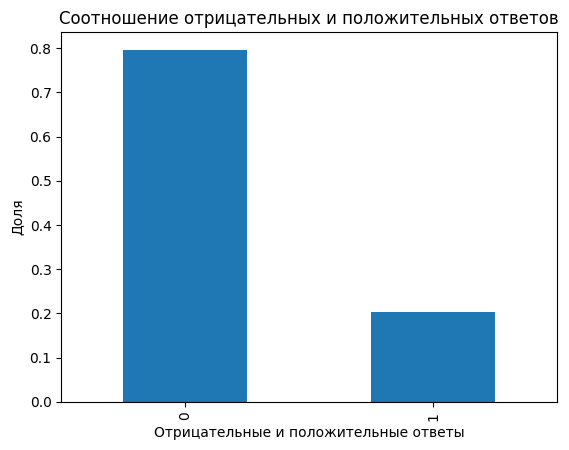

In [12]:
print('Посмотрим соотношение отрицательных и положительных ответов:')
print()
class_frequency = data['Exited'].value_counts(normalize= (0, 1))
print(class_frequency)
print()
print('Отрицательных в 4 раза больше.')
class_frequency.plot(kind='bar')
plt.xlabel('Отрицательные и положительные ответы')
plt.ylabel('Доля')
plt.title('Соотношение отрицательных и положительных ответов')
plt.show()

In [13]:
print('Увеличим выборку в 4 раза на модели RandomForestClassifier:')
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled_rf = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled_rf = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled_rf, target_upsampled_rf = shuffle(
        features_upsampled_rf, target_upsampled_rf, random_state=12345)

    return features_upsampled_rf, target_upsampled_rf

features_upsampled_rf, target_upsampled_rf = upsample(features_train, target_train, 4)
model_rfup = RandomForestClassifier(max_depth=20, n_estimators=130, random_state=12345)
model_rfup.fit(features_upsampled_rf, target_upsampled_rf)
predicted_valid_rfup=model_rfup.predict(features_valid)
f1_rf = f1_score(target_valid, predicted_valid_rfup)
probabilities = model_rfup.predict_proba(features_valid)
probabilities_one_rfup = probabilities[:, 1]
roc_auc_rf = roc_auc_score(target_valid, probabilities_one_rfup)
print("При увеличении выборки F1:", f1_rf)
print('Площадь ROC-кривой:', roc_auc_rf)


print()
print('Увеличим выборку в 4 раза на модели DecisionTreeClassifier:')
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled_dt = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled_dt = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled_dt, target_upsampled_dt = shuffle(
        features_upsampled_dt, target_upsampled_dt, random_state=12345)

    return features_upsampled_dt, target_upsampled_dt

features_upsampled_dt, target_upsampled_dt = upsample(features_train, target_train, 4)
model_dtup = DecisionTreeClassifier(random_state = 12345, max_depth = 8)
model_dtup.fit(features_upsampled_dt, target_upsampled_dt)
predicted_valid_dtup=model_dtup.predict(features_valid)
f1_dt = f1_score(target_valid, predicted_valid_dtup)
probabilities = model_dtup.predict_proba(features_valid)
probabilities_one_dtup = probabilities[:, 1]
roc_auc_dt = roc_auc_score(target_valid, probabilities_one_dtup)
print("При увеличении выборки F1:", f1_dt)
print('Площадь ROC-кривой:', roc_auc_dt)


print()
print('Увеличим выборку в 4 раза на модели LogisticRegression:')
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_lrup = LogisticRegression(random_state=12345, solver='liblinear')
model_lrup.fit(features_upsampled, target_upsampled)
predicted_valid_lrup=model_lrup.predict(features_valid)
f1_lr=f1_score(target_valid, predicted_valid_lrup)
probabilities = model_lrup.predict_proba(features_valid)
probabilities_one_lrup = probabilities[:, 1]
roc_auc_lr = roc_auc_score(target_valid, probabilities_one_lrup)
print("При увеличении выборки F1:", f1_lr)
print('Площадь ROC-кривой:', roc_auc_lr)

Увеличим выборку в 4 раза на модели RandomForestClassifier:
При увеличении выборки F1: 0.5877659574468084
Площадь ROC-кривой: 0.8376951682036429

Увеличим выборку в 4 раза на модели DecisionTreeClassifier:
При увеличении выборки F1: 0.5302879841112214
Площадь ROC-кривой: 0.766834631241411

Увеличим выборку в 4 раза на модели LogisticRegression:
При увеличении выборки F1: 0.481675392670157
Площадь ROC-кривой: 0.7625344913480507


In [14]:
print('Уменьшим выборку в 4 раза на модели RandomForestClassifier:')
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled_rf = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled_rf = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled_rf, target_downsampled_rf = shuffle(features_downsampled_rf, target_downsampled_rf, random_state=12345)

    return features_downsampled_rf, target_downsampled_rf

features_downsampled_rf, target_downsampled_rf = downsample(features_train, target_train, 0.25)

model_rfdw = RandomForestClassifier(max_depth=20, n_estimators=130, random_state=12345)
model_rfdw.fit(features_downsampled_rf, target_downsampled_rf)
predicted_valid_rfdw=model_rfdw.predict(features_valid)
f1_rfdw = f1_score(target_valid, predicted_valid_rfdw)
probabilities = model_rfdw.predict_proba(features_valid)
probabilities_one_rfdw = probabilities[:, 1]
roc_auc_rfdw = roc_auc_score(target_valid, probabilities_one_rfdw)
print("При уменьшении выборки F1:", f1_rfdw)
print('Площадь ROC-кривой:', roc_auc_rfdw)


print()
print('Уменьшим выборку в 4 раза на модели DecisionTreeClassifier')
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled_dt = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled_dt = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled_dt, target_downsampled_dt = shuffle(features_downsampled_dt, target_downsampled_dt, random_state=12345)

    return features_downsampled_dt, target_downsampled_dt

features_downsampled_dt, target_downsampled_dt = downsample(features_train, target_train, 0.25)

model_dtdw = DecisionTreeClassifier(random_state = 12345, max_depth = 8)
model_dtdw.fit(features_downsampled_dt, target_downsampled_dt)
predicted_valid_dtdw=model_dtdw.predict(features_valid)
f1_dtdw = f1_score(target_valid, predicted_valid_dtdw)
probabilities = model_dtdw.predict_proba(features_valid)
probabilities_one_dtdw = probabilities[:, 1]
roc_auc_dtdw = roc_auc_score(target_valid, probabilities_one_dtdw)
print("При уменьшении выборки F1:", f1_dtdw)
print('Площадь ROC-кривой:', roc_auc_dtdw)


print()
print('Уменьшим выборку в 4 раза на модели LogisticRegression')
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model_lrdw = LogisticRegression(random_state=12345, solver='liblinear')
model_lrdw.fit(features_downsampled, target_downsampled)
predicted_valid_lrdw=model_lrdw.predict(features_valid)
f1_lrdw = f1_score(target_valid, predicted_valid_lrdw)
probabilities = model_lrdw.predict_proba(features_valid)
probabilities_one_lrdw = probabilities[:, 1]
roc_auc_lrdw = roc_auc_score(target_valid, probabilities_one_lrdw)
print("При уменьшении выборки F1:", f1_lrdw)
print('Площадь ROC-кривой:', roc_auc_lrdw)

Уменьшим выборку в 4 раза на модели RandomForestClassifier:
При уменьшении выборки F1: 0.5716963448922212
Площадь ROC-кривой: 0.8404274844952812

Уменьшим выборку в 4 раза на модели DecisionTreeClassifier
При уменьшении выборки F1: 0.5257032007759458
Площадь ROC-кривой: 0.7769688023925311

Уменьшим выборку в 4 раза на модели LogisticRegression
При уменьшении выборки F1: 0.48428207306711973
Площадь ROC-кривой: 0.7614887614887615


In [15]:
model_rfth = RandomForestClassifier(max_depth=20, n_estimators=130, random_state=12345)
model_rfth.fit(features_train, target_train)
probabilities_valid_rfth = model_rfth.predict_proba(features_valid)
probabilities_one_valid_rfth = probabilities_valid_rfth[:, 1]

print()
best_f1_rf = 0
best_threshold_rf = 0
for threshold_rf in np.arange(0, 1.0, 0.02):
    predicted_valid_rfth = probabilities_one_valid_rfth > threshold_rf
    precision_rfth = precision_score(target_valid, predicted_valid_rfth)
    recall_rfth = recall_score(target_valid, predicted_valid_rfth)
    f1 = f1_score(target_valid, predicted_valid_rfth)
    if f1 > best_f1_rf:
        best_threshold_rf = threshold_rf
        best_f1_rf = f1

f1_rfth = f1_score(target_valid, predicted_valid_rfth)
probabilities = model_rfth.predict_proba(features_valid)
probabilities_one_rfth = probabilities[:, 1]
roc_auc_rfth = roc_auc_score(target_valid, probabilities_one_rfth)
print(f'При пороге {best_threshold_rf} значение f1 = {best_f1_rf}. Это лучший порог для модели RandomForestClassifier')
print('Площадь ROC-кривой:', roc_auc_rfth)


print()
best_f1_dt = 0
best_threshold_dt = 0
model_dtth = DecisionTreeClassifier(random_state = 12345, max_depth = 8)
model_dtth.fit(features_train, target_train)
probabilities_valid_dtth = model_dtth.predict_proba(features_valid)
probabilities_one_valid_dtth = probabilities_valid_dtth[:, 1]

for threshold_dt in np.arange(0, 1.0, 0.02):
    predicted_valid_dtth = probabilities_one_valid_dtth > threshold_dt
    precision_dtth = precision_score(target_valid, predicted_valid_dtth)
    recall_dtth = recall_score(target_valid, predicted_valid_dtth)
    f1 = f1_score(target_valid, predicted_valid_dtth)
    if f1 > best_f1_dt:
        best_threshold_dt = threshold_dt
        best_f1_dt = f1

f1_dtth = f1_score(target_valid, predicted_valid_dtth)
probabilities = model_dtth.predict_proba(features_valid)
probabilities_one_dtth = probabilities[:, 1]
roc_auc_dtth = roc_auc_score(target_valid, probabilities_one_dtth)
print(f'При пороге {best_threshold_dt} значение f1 = {best_f1_dt}. Это лучший порог для модели DecisionTreeClassifier')
print('Площадь ROC-кривой:', roc_auc_dtth)


print()
best_f1_lr = 0
best_threshold_lr = 0
model_lrth = LogisticRegression(random_state=12345, solver='liblinear')
model_lrth.fit(features_train, target_train)
probabilities_valid_lrth = model_lrth.predict_proba(features_valid)
probabilities_one_valid_lrth = probabilities_valid_lrth[:, 1]


for threshold_lr in np.arange(0, 1.0, 0.02):
    predicted_valid_lrth = probabilities_one_valid_lrth > threshold_lr
    precision_lrth = precision_score(target_valid, predicted_valid_lrth)
    recall_lrth = recall_score(target_valid, predicted_valid_lrth)
    f1 = f1_score(target_valid, predicted_valid_lrth)
    if f1 > best_f1_lr:
        best_threshold_lr = threshold_lr
        best_f1_lr = f1

f1_lrth = f1_score(target_valid, predicted_valid_lrth)
probabilities = model_lrth.predict_proba(features_valid)
probabilities_one_lrth = probabilities[:, 1]
roc_auc_lrth = roc_auc_score(target_valid, probabilities_one_lrth)
print(f'При пороге {best_threshold_lr} значение f1 = {best_f1_lr}. Это лучший порог для модели LogisticRegression')
print('Площадь ROC-кривой:', roc_auc_lrth)




При пороге 0.38 значение f1 = 0.6180904522613065. Это лучший порог для модели RandomForestClassifier
Площадь ROC-кривой: 0.8406387897913322

При пороге 0.24 значение f1 = 0.576271186440678. Это лучший порог для модели DecisionTreeClassifier
Площадь ROC-кривой: 0.8086723086723087

При пороге 0.28 значение f1 = 0.49043869516310457. Это лучший порог для модели LogisticRegression
Площадь ROC-кривой: 0.7579937410445886


In [16]:
display('Итоги по обучению модели RandomForestClassifier. Лучший показатель при изменении порога')
all_rf = pd.DataFrame({'Метрика': ['f1', 'roc-кривая'], 'Дисбал.с подб.гиперпарам.': [0.6049926578560939, 0.854873324958124],
                       'Увеличение выборки': [f1_rf, roc_auc_rf], 'Уменьшение выборки': [f1_rfdw, roc_auc_rfdw],
                       'Изменение порога': [best_f1_rf, roc_auc_rfth]})
display(all_rf)

display('Итоги по обучению модели DecisionTreeClassifierr. Лучший показатель при изменении порога')
all_dt = pd.DataFrame({'Метрика': ['f1', 'roc-кривая'], 'Дисбал.с подб.гиперпарам.': [0.5918653576437587, 0.696154639619667],
                       'Увеличение выборки': [f1_dt, roc_auc_dt], 'Уменьшение выборки': [f1_dtdw, roc_auc_dtdw],
                       'Изменение порога': [best_f1_dt, roc_auc_dtth]})
display(all_dt)

display('Итоги по обучению модели LogisticRegression. Лучший показатель при изменении порога')
all_lr = pd.DataFrame({'Метрика': ['f1', 'roc-кривая'], 'Дисбал.с подб.гиперпарам.': [0.36869565217391304, 0.761822285446842],
                       'Увеличение выборки': [f1_lr, roc_auc_lr], 'Уменьшение выборки': [f1_lrdw, roc_auc_lrdw],
                       'Изменение порога': [best_f1_lr, roc_auc_lrth]})
display(all_lr)

'Итоги по обучению модели RandomForestClassifier. Лучший показатель при изменении порога'

,Метрика,Дисбал.с подб.гиперпарам.,Увеличение выборки,Уменьшение выборки,Изменение порога
0,f1,0.604993,0.587766,0.571696,0.618090
1,roc-кривая,0.854873,0.837695,0.840427,0.840639


'Итоги по обучению модели DecisionTreeClassifierr. Лучший показатель при изменении порога'

,Метрика,Дисбал.с подб.гиперпарам.,Увеличение выборки,Уменьшение выборки,Изменение порога
0,f1,0.591865,0.530288,0.525703,0.576271
1,roc-кривая,0.696155,0.766835,0.776969,0.808672


'Итоги по обучению модели LogisticRegression. Лучший показатель при изменении порога'

,Метрика,Дисбал.с подб.гиперпарам.,Увеличение выборки,Уменьшение выборки,Изменение порога
0,f1,0.368696,0.481675,0.484282,0.490439
1,roc-кривая,0.761822,0.762534,0.761489,0.757994


Посмотрели как обучаются 3 модели при
- увеличении выборки,
- уменьшении выборки,
- изменении порога.

**Вывод:**
1. Лушчий показатель F1= 0.61521 и площади ROC-кривой = 1.0
2. Он принадлежит модели Случайный лес при изменении порога с подобранными гиперпараметрами: глубина 20, количество деревьев - 130, порог - 0,32.
3. Для тестирования берем ее.

## Тестирование модели

In [17]:
model= RandomForestClassifier(max_depth=20, n_estimators=130, random_state=12345)
model.fit(features_train, target_train)
predicted_test = (model.predict_proba(features_test)[:, 1] >= 0.32).astype(bool)

print('test:', f1_score(target_test, predicted_test))
print('recall:',recall_score(model.predict(features_test), target_test))

test: 0.634032634032634
recall: 0.7629310344827587


In [18]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
predict_dummy=dummy_model.predict(features_train)

print('dummy:',f1_score(dummy_model.predict(features_test), target_test))

dummy: 0.3381803074366431


## Итоги работы


1. Лучше всего обучается модедь Случайный лес.
2. Балансировка выборки не всегда улучшает обучение. Однако, стоит отметить, что балансировка помогает обучению модели лог.регрессия. У нее самый заметный рост.
3. Пороги значительно улучшают обучение всех трех моделей.

4. Наша модель обучена более, чем на 0,59 благодаря новому порогу.
5. в 76% модель дает верные предсказания.